## ML_With_Julia Assignment
### Polynomial Regression
#### We will try to approximate the function `y(x) = 3x^2 + 4x + 9`
#### Index :
#### - With handwritten gradient
#### - Using zygote to calculate gradient
### ~Prem Bharwani

---
Imports

In [2]:
using Plots,Zygote,Printf

Defining the input values(x) and corresponding output values

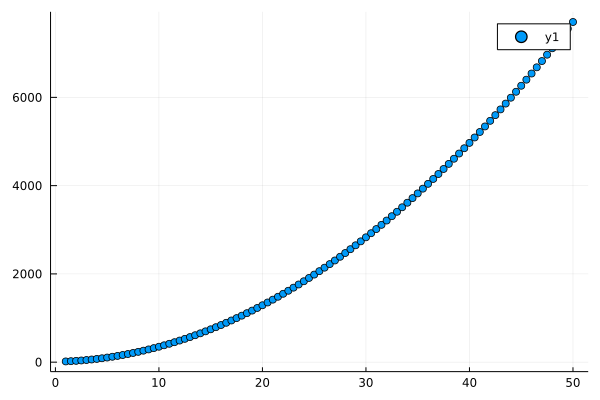

In [3]:
x = collect(1:0.5:50)
y = (3 .* x.^2 ) + (4 .* x) .+ 9
plot(x,y,seriestype=:scatter)

##### Now we have the points ready , let us approximate a function :
     f(x,p,q,r) = px^2 + qx + r

In [4]:
f(x,p,q,r) = p*x^2 + q*x + r

f (generic function with 1 method)

Loss function

In [5]:
loss(y,ŷ) = (y-ŷ)^2 / 2

loss (generic function with 1 method)

### Let us define the gradient for the handwritten rules 
### Now that we know the loss function, lets write down the gradient wrt p,q and r
###    gradp = (ŷ-y)*x^2
###    gradq = (ŷ-y)*x
###    gradr = (ŷ-y)

In [6]:
p=rand()
q=rand()
r=rand()
η=0.000001
ctr=0

while true
    
    grad_p=0
    grad_q=0
    grad_r=0
    net_loss=0
    
    for i = 1:length(x)
        ŷ=f(x[i],p,q,r)
        net_loss += loss(y[i],ŷ)
        grad_p += (ŷ-y[i])*x[i]^2
        grad_q += (ŷ-y[i])*x[i]
        grad_r += (ŷ-y[i])
    end

    net_loss/=length(x)
    grad_p/=length(x)
    grad_q/=length(x)
    grad_r/=length(x)

    p -= η*grad_p
    q -= η*grad_q
    r -= η*grad_r
    
    if(ctr%100==0)
        @printf("%d loss=%.2f p=%.2f q=%.2f r=%.2f\n",ctr+1,net_loss,p,q,r)
    end
    
    ctr+=1
    
    if(isnan(net_loss))
        print("\n\n*************NOT A NUMBER FOUND**********************")
        break
    end
    
    if(net_loss<1)
        break
    end
end
    

1 loss=3265718.24 p=3.75 q=0.87 r=0.50
101 loss=389.33 p=3.08 q=0.87 r=0.50
201 loss=385.21 p=3.08 q=0.89 r=0.50
301 loss=381.13 p=3.08 q=0.91 r=0.50
401 loss=377.09 p=3.08 q=0.93 r=0.51
501 loss=373.10 p=3.08 q=0.95 r=0.51
601 loss=369.15 p=3.08 q=0.97 r=0.51
701 loss=365.24 p=3.08 q=0.99 r=0.51
801 loss=361.37 p=3.08 q=1.01 r=0.51
901 loss=357.55 p=3.08 q=1.03 r=0.51
1001 loss=353.77 p=3.08 q=1.05 r=0.52
1101 loss=350.02 p=3.08 q=1.07 r=0.52
1201 loss=346.32 p=3.08 q=1.09 r=0.52
1301 loss=342.65 p=3.08 q=1.11 r=0.52
1401 loss=339.03 p=3.08 q=1.13 r=0.52
1501 loss=335.44 p=3.08 q=1.15 r=0.52
1601 loss=331.89 p=3.08 q=1.17 r=0.53
1701 loss=328.38 p=3.08 q=1.19 r=0.53
1801 loss=324.91 p=3.08 q=1.20 r=0.53
1901 loss=321.48 p=3.07 q=1.22 r=0.53
2001 loss=318.08 p=3.07 q=1.24 r=0.53
2101 loss=314.71 p=3.07 q=1.26 r=0.53
2201 loss=311.39 p=3.07 q=1.28 r=0.54
2301 loss=308.10 p=3.07 q=1.30 r=0.54
2401 loss=304.84 p=3.07 q=1.31 r=0.54
2501 loss=301.62 p=3.07 q=1.33 r=0.54
2601 loss=298.43 p=3

22401 loss=38.49 p=3.02 q=3.51 r=0.73
22501 loss=38.11 p=3.02 q=3.52 r=0.73
22601 loss=37.74 p=3.02 q=3.52 r=0.73
22701 loss=37.37 p=3.02 q=3.53 r=0.73
22801 loss=37.01 p=3.02 q=3.53 r=0.73
22901 loss=36.65 p=3.02 q=3.54 r=0.73
23001 loss=36.29 p=3.02 q=3.55 r=0.73
23101 loss=35.94 p=3.02 q=3.55 r=0.73
23201 loss=35.59 p=3.02 q=3.56 r=0.73
23301 loss=35.25 p=3.02 q=3.56 r=0.73
23401 loss=34.91 p=3.02 q=3.57 r=0.74
23501 loss=34.57 p=3.02 q=3.58 r=0.74
23601 loss=34.23 p=3.02 q=3.58 r=0.74
23701 loss=33.90 p=3.02 q=3.59 r=0.74
23801 loss=33.58 p=3.02 q=3.59 r=0.74
23901 loss=33.25 p=3.02 q=3.60 r=0.74
24001 loss=32.93 p=3.02 q=3.60 r=0.74
24101 loss=32.62 p=3.02 q=3.61 r=0.74
24201 loss=32.30 p=3.02 q=3.62 r=0.74
24301 loss=31.99 p=3.01 q=3.62 r=0.74
24401 loss=31.69 p=3.01 q=3.63 r=0.74
24501 loss=31.38 p=3.01 q=3.63 r=0.74
24601 loss=31.08 p=3.01 q=3.64 r=0.74
24701 loss=30.79 p=3.01 q=3.64 r=0.74
24801 loss=30.49 p=3.01 q=3.65 r=0.74
24901 loss=30.20 p=3.01 q=3.65 r=0.74
25001 loss=2

44401 loss=6.59 p=3.00 q=4.30 r=0.81
44501 loss=6.56 p=3.00 q=4.30 r=0.81
44601 loss=6.52 p=3.00 q=4.30 r=0.81
44701 loss=6.49 p=3.00 q=4.31 r=0.81
44801 loss=6.45 p=3.00 q=4.31 r=0.81
44901 loss=6.42 p=3.00 q=4.31 r=0.81
45001 loss=6.39 p=3.00 q=4.31 r=0.81
45101 loss=6.35 p=3.00 q=4.31 r=0.81
45201 loss=6.32 p=3.00 q=4.31 r=0.81
45301 loss=6.29 p=3.00 q=4.32 r=0.81
45401 loss=6.26 p=3.00 q=4.32 r=0.81
45501 loss=6.22 p=3.00 q=4.32 r=0.81
45601 loss=6.19 p=3.00 q=4.32 r=0.81
45701 loss=6.16 p=3.00 q=4.32 r=0.81
45801 loss=6.13 p=3.00 q=4.33 r=0.81
45901 loss=6.10 p=3.00 q=4.33 r=0.81
46001 loss=6.07 p=3.00 q=4.33 r=0.81
46101 loss=6.04 p=3.00 q=4.33 r=0.81
46201 loss=6.01 p=3.00 q=4.33 r=0.81
46301 loss=5.98 p=3.00 q=4.33 r=0.81
46401 loss=5.95 p=3.00 q=4.34 r=0.81
46501 loss=5.92 p=3.00 q=4.34 r=0.81
46601 loss=5.90 p=3.00 q=4.34 r=0.82
46701 loss=5.87 p=3.00 q=4.34 r=0.82
46801 loss=5.84 p=3.00 q=4.34 r=0.82
46901 loss=5.81 p=3.00 q=4.34 r=0.82
47001 loss=5.79 p=3.00 q=4.35 r=0.82
4

68001 loss=3.53 p=2.99 q=4.55 r=0.85
68101 loss=3.53 p=2.99 q=4.55 r=0.85
68201 loss=3.52 p=2.99 q=4.55 r=0.85
68301 loss=3.52 p=2.99 q=4.55 r=0.85
68401 loss=3.52 p=2.99 q=4.55 r=0.85
68501 loss=3.51 p=2.99 q=4.55 r=0.85
68601 loss=3.51 p=2.99 q=4.55 r=0.85
68701 loss=3.51 p=2.99 q=4.55 r=0.85
68801 loss=3.51 p=2.99 q=4.55 r=0.85
68901 loss=3.50 p=2.99 q=4.55 r=0.85
69001 loss=3.50 p=2.99 q=4.56 r=0.85
69101 loss=3.50 p=2.99 q=4.56 r=0.85
69201 loss=3.50 p=2.99 q=4.56 r=0.85
69301 loss=3.49 p=2.99 q=4.56 r=0.85
69401 loss=3.49 p=2.99 q=4.56 r=0.85
69501 loss=3.49 p=2.99 q=4.56 r=0.85
69601 loss=3.49 p=2.99 q=4.56 r=0.85
69701 loss=3.48 p=2.99 q=4.56 r=0.85
69801 loss=3.48 p=2.99 q=4.56 r=0.85
69901 loss=3.48 p=2.99 q=4.56 r=0.85
70001 loss=3.48 p=2.99 q=4.56 r=0.85
70101 loss=3.47 p=2.99 q=4.56 r=0.85
70201 loss=3.47 p=2.99 q=4.56 r=0.85
70301 loss=3.47 p=2.99 q=4.56 r=0.85
70401 loss=3.47 p=2.99 q=4.56 r=0.85
70501 loss=3.46 p=2.99 q=4.56 r=0.85
70601 loss=3.46 p=2.99 q=4.56 r=0.85
7

90401 loss=3.27 p=2.99 q=4.62 r=0.87
90501 loss=3.27 p=2.99 q=4.62 r=0.87
90601 loss=3.27 p=2.99 q=4.62 r=0.87
90701 loss=3.27 p=2.99 q=4.62 r=0.87
90801 loss=3.27 p=2.99 q=4.62 r=0.87
90901 loss=3.27 p=2.99 q=4.62 r=0.87
91001 loss=3.27 p=2.99 q=4.62 r=0.87
91101 loss=3.27 p=2.99 q=4.62 r=0.87
91201 loss=3.27 p=2.99 q=4.62 r=0.87
91301 loss=3.27 p=2.99 q=4.62 r=0.87
91401 loss=3.27 p=2.99 q=4.62 r=0.87
91501 loss=3.27 p=2.99 q=4.62 r=0.87
91601 loss=3.27 p=2.99 q=4.62 r=0.87
91701 loss=3.27 p=2.99 q=4.62 r=0.87
91801 loss=3.27 p=2.99 q=4.62 r=0.87
91901 loss=3.27 p=2.99 q=4.62 r=0.87
92001 loss=3.27 p=2.99 q=4.62 r=0.87
92101 loss=3.27 p=2.99 q=4.62 r=0.87
92201 loss=3.27 p=2.99 q=4.62 r=0.87
92301 loss=3.27 p=2.99 q=4.62 r=0.87
92401 loss=3.27 p=2.99 q=4.62 r=0.87
92501 loss=3.27 p=2.99 q=4.62 r=0.87
92601 loss=3.27 p=2.99 q=4.62 r=0.87
92701 loss=3.27 p=2.99 q=4.62 r=0.87
92801 loss=3.27 p=2.99 q=4.62 r=0.87
92901 loss=3.27 p=2.99 q=4.62 r=0.87
93001 loss=3.27 p=2.99 q=4.62 r=0.87
9

113001 loss=3.24 p=2.99 q=4.64 r=0.89
113101 loss=3.24 p=2.99 q=4.64 r=0.89
113201 loss=3.24 p=2.99 q=4.64 r=0.89
113301 loss=3.24 p=2.99 q=4.64 r=0.89
113401 loss=3.24 p=2.99 q=4.64 r=0.89
113501 loss=3.24 p=2.99 q=4.64 r=0.89
113601 loss=3.24 p=2.99 q=4.64 r=0.89
113701 loss=3.24 p=2.99 q=4.64 r=0.89
113801 loss=3.24 p=2.99 q=4.64 r=0.89
113901 loss=3.24 p=2.99 q=4.64 r=0.89
114001 loss=3.24 p=2.99 q=4.64 r=0.89
114101 loss=3.24 p=2.99 q=4.64 r=0.89
114201 loss=3.24 p=2.99 q=4.64 r=0.89
114301 loss=3.24 p=2.99 q=4.64 r=0.89
114401 loss=3.24 p=2.99 q=4.64 r=0.89
114501 loss=3.24 p=2.99 q=4.64 r=0.89
114601 loss=3.24 p=2.99 q=4.64 r=0.89
114701 loss=3.24 p=2.99 q=4.64 r=0.89
114801 loss=3.24 p=2.99 q=4.64 r=0.89
114901 loss=3.24 p=2.99 q=4.64 r=0.89
115001 loss=3.24 p=2.99 q=4.64 r=0.89
115101 loss=3.24 p=2.99 q=4.64 r=0.89
115201 loss=3.24 p=2.99 q=4.64 r=0.89
115301 loss=3.24 p=2.99 q=4.64 r=0.89
115401 loss=3.24 p=2.99 q=4.64 r=0.89
115501 loss=3.24 p=2.99 q=4.64 r=0.89
115601 loss=

135401 loss=3.22 p=2.99 q=4.64 r=0.91
135501 loss=3.22 p=2.99 q=4.64 r=0.91
135601 loss=3.22 p=2.99 q=4.64 r=0.91
135701 loss=3.22 p=2.99 q=4.64 r=0.91
135801 loss=3.22 p=2.99 q=4.64 r=0.91
135901 loss=3.22 p=2.99 q=4.64 r=0.91
136001 loss=3.22 p=2.99 q=4.64 r=0.91
136101 loss=3.22 p=2.99 q=4.64 r=0.91
136201 loss=3.22 p=2.99 q=4.64 r=0.91
136301 loss=3.22 p=2.99 q=4.64 r=0.91
136401 loss=3.22 p=2.99 q=4.64 r=0.91
136501 loss=3.22 p=2.99 q=4.64 r=0.91
136601 loss=3.22 p=2.99 q=4.64 r=0.91
136701 loss=3.22 p=2.99 q=4.64 r=0.91
136801 loss=3.22 p=2.99 q=4.64 r=0.91
136901 loss=3.22 p=2.99 q=4.64 r=0.91
137001 loss=3.22 p=2.99 q=4.64 r=0.91
137101 loss=3.22 p=2.99 q=4.64 r=0.91
137201 loss=3.22 p=2.99 q=4.64 r=0.91
137301 loss=3.22 p=2.99 q=4.64 r=0.91
137401 loss=3.22 p=2.99 q=4.64 r=0.91
137501 loss=3.22 p=2.99 q=4.64 r=0.91
137601 loss=3.22 p=2.99 q=4.64 r=0.91
137701 loss=3.22 p=2.99 q=4.64 r=0.91
137801 loss=3.22 p=2.99 q=4.64 r=0.91
137901 loss=3.22 p=2.99 q=4.64 r=0.91
138001 loss=

158401 loss=3.21 p=2.99 q=4.64 r=0.93
158501 loss=3.21 p=2.99 q=4.64 r=0.93
158601 loss=3.21 p=2.99 q=4.64 r=0.93
158701 loss=3.21 p=2.99 q=4.64 r=0.93
158801 loss=3.21 p=2.99 q=4.64 r=0.93
158901 loss=3.21 p=2.99 q=4.64 r=0.93
159001 loss=3.21 p=2.99 q=4.64 r=0.93
159101 loss=3.21 p=2.99 q=4.64 r=0.93
159201 loss=3.21 p=2.99 q=4.64 r=0.93
159301 loss=3.21 p=2.99 q=4.64 r=0.93
159401 loss=3.21 p=2.99 q=4.64 r=0.93
159501 loss=3.21 p=2.99 q=4.64 r=0.93
159601 loss=3.21 p=2.99 q=4.64 r=0.93
159701 loss=3.21 p=2.99 q=4.64 r=0.93
159801 loss=3.21 p=2.99 q=4.64 r=0.93
159901 loss=3.21 p=2.99 q=4.64 r=0.93
160001 loss=3.21 p=2.99 q=4.64 r=0.93
160101 loss=3.21 p=2.99 q=4.64 r=0.93
160201 loss=3.21 p=2.99 q=4.64 r=0.93
160301 loss=3.21 p=2.99 q=4.64 r=0.93
160401 loss=3.21 p=2.99 q=4.64 r=0.93
160501 loss=3.21 p=2.99 q=4.64 r=0.93
160601 loss=3.21 p=2.99 q=4.64 r=0.93
160701 loss=3.21 p=2.99 q=4.64 r=0.93
160801 loss=3.21 p=2.99 q=4.64 r=0.93
160901 loss=3.21 p=2.99 q=4.64 r=0.93
161001 loss=

181001 loss=3.19 p=2.99 q=4.64 r=0.95
181101 loss=3.19 p=2.99 q=4.64 r=0.95
181201 loss=3.19 p=2.99 q=4.64 r=0.95
181301 loss=3.19 p=2.99 q=4.64 r=0.95
181401 loss=3.19 p=2.99 q=4.64 r=0.95
181501 loss=3.19 p=2.99 q=4.64 r=0.95
181601 loss=3.19 p=2.99 q=4.64 r=0.95
181701 loss=3.19 p=2.99 q=4.64 r=0.95
181801 loss=3.19 p=2.99 q=4.64 r=0.95
181901 loss=3.19 p=2.99 q=4.64 r=0.95
182001 loss=3.19 p=2.99 q=4.64 r=0.95
182101 loss=3.19 p=2.99 q=4.64 r=0.95
182201 loss=3.19 p=2.99 q=4.64 r=0.95
182301 loss=3.19 p=2.99 q=4.64 r=0.95
182401 loss=3.19 p=2.99 q=4.64 r=0.95
182501 loss=3.19 p=2.99 q=4.64 r=0.95
182601 loss=3.19 p=2.99 q=4.64 r=0.95
182701 loss=3.19 p=2.99 q=4.64 r=0.95
182801 loss=3.19 p=2.99 q=4.64 r=0.95
182901 loss=3.19 p=2.99 q=4.64 r=0.95
183001 loss=3.19 p=2.99 q=4.64 r=0.95
183101 loss=3.19 p=2.99 q=4.64 r=0.95
183201 loss=3.19 p=2.99 q=4.64 r=0.95
183301 loss=3.19 p=2.99 q=4.64 r=0.95
183401 loss=3.19 p=2.99 q=4.64 r=0.95
183501 loss=3.19 p=2.99 q=4.64 r=0.95
183601 loss=

203001 loss=3.18 p=2.99 q=4.64 r=0.96
203101 loss=3.18 p=2.99 q=4.64 r=0.96
203201 loss=3.18 p=2.99 q=4.64 r=0.96
203301 loss=3.18 p=2.99 q=4.64 r=0.96
203401 loss=3.18 p=2.99 q=4.64 r=0.96
203501 loss=3.18 p=2.99 q=4.64 r=0.96
203601 loss=3.18 p=2.99 q=4.64 r=0.96
203701 loss=3.18 p=2.99 q=4.64 r=0.96
203801 loss=3.18 p=2.99 q=4.64 r=0.96
203901 loss=3.18 p=2.99 q=4.64 r=0.96
204001 loss=3.18 p=2.99 q=4.64 r=0.96
204101 loss=3.18 p=2.99 q=4.64 r=0.96
204201 loss=3.18 p=2.99 q=4.64 r=0.96
204301 loss=3.18 p=2.99 q=4.64 r=0.96
204401 loss=3.18 p=2.99 q=4.64 r=0.96
204501 loss=3.18 p=2.99 q=4.64 r=0.96
204601 loss=3.18 p=2.99 q=4.64 r=0.97
204701 loss=3.18 p=2.99 q=4.64 r=0.97
204801 loss=3.18 p=2.99 q=4.64 r=0.97
204901 loss=3.18 p=2.99 q=4.64 r=0.97
205001 loss=3.18 p=2.99 q=4.64 r=0.97
205101 loss=3.18 p=2.99 q=4.64 r=0.97
205201 loss=3.18 p=2.99 q=4.64 r=0.97
205301 loss=3.18 p=2.99 q=4.64 r=0.97
205401 loss=3.18 p=2.99 q=4.64 r=0.97
205501 loss=3.18 p=2.99 q=4.64 r=0.97
205601 loss=

226001 loss=3.17 p=2.99 q=4.64 r=0.98
226101 loss=3.17 p=2.99 q=4.64 r=0.98
226201 loss=3.17 p=2.99 q=4.64 r=0.98
226301 loss=3.17 p=2.99 q=4.64 r=0.98
226401 loss=3.17 p=2.99 q=4.64 r=0.98
226501 loss=3.17 p=2.99 q=4.64 r=0.98
226601 loss=3.17 p=2.99 q=4.64 r=0.98
226701 loss=3.17 p=2.99 q=4.64 r=0.98
226801 loss=3.17 p=2.99 q=4.64 r=0.98
226901 loss=3.17 p=2.99 q=4.64 r=0.98
227001 loss=3.17 p=2.99 q=4.64 r=0.98
227101 loss=3.17 p=2.99 q=4.64 r=0.98
227201 loss=3.17 p=2.99 q=4.64 r=0.98
227301 loss=3.17 p=2.99 q=4.64 r=0.98
227401 loss=3.16 p=2.99 q=4.64 r=0.98
227501 loss=3.16 p=2.99 q=4.64 r=0.98
227601 loss=3.16 p=2.99 q=4.64 r=0.98
227701 loss=3.16 p=2.99 q=4.64 r=0.98
227801 loss=3.16 p=2.99 q=4.64 r=0.98
227901 loss=3.16 p=2.99 q=4.64 r=0.98
228001 loss=3.16 p=2.99 q=4.64 r=0.98
228101 loss=3.16 p=2.99 q=4.64 r=0.98
228201 loss=3.16 p=2.99 q=4.64 r=0.98
228301 loss=3.16 p=2.99 q=4.64 r=0.98
228401 loss=3.16 p=2.99 q=4.64 r=0.98
228501 loss=3.16 p=2.99 q=4.64 r=0.98
228601 loss=

249001 loss=3.15 p=2.99 q=4.64 r=1.00
249101 loss=3.15 p=2.99 q=4.64 r=1.00
249201 loss=3.15 p=2.99 q=4.64 r=1.00
249301 loss=3.15 p=2.99 q=4.64 r=1.00
249401 loss=3.15 p=2.99 q=4.64 r=1.00
249501 loss=3.15 p=2.99 q=4.64 r=1.00
249601 loss=3.15 p=2.99 q=4.64 r=1.00
249701 loss=3.15 p=2.99 q=4.64 r=1.00
249801 loss=3.15 p=2.99 q=4.64 r=1.00
249901 loss=3.15 p=2.99 q=4.64 r=1.00
250001 loss=3.15 p=2.99 q=4.64 r=1.00
250101 loss=3.15 p=2.99 q=4.64 r=1.00
250201 loss=3.15 p=2.99 q=4.64 r=1.00
250301 loss=3.15 p=2.99 q=4.64 r=1.00
250401 loss=3.15 p=2.99 q=4.64 r=1.00
250501 loss=3.15 p=2.99 q=4.64 r=1.00
250601 loss=3.15 p=2.99 q=4.64 r=1.00
250701 loss=3.15 p=2.99 q=4.64 r=1.00
250801 loss=3.15 p=2.99 q=4.64 r=1.00
250901 loss=3.15 p=2.99 q=4.64 r=1.00
251001 loss=3.15 p=2.99 q=4.64 r=1.00
251101 loss=3.15 p=2.99 q=4.64 r=1.00
251201 loss=3.15 p=2.99 q=4.64 r=1.00
251301 loss=3.15 p=2.99 q=4.64 r=1.00
251401 loss=3.15 p=2.99 q=4.64 r=1.00
251501 loss=3.15 p=2.99 q=4.64 r=1.00
251601 loss=

272401 loss=3.14 p=2.99 q=4.64 r=1.02
272501 loss=3.14 p=2.99 q=4.64 r=1.02
272601 loss=3.14 p=2.99 q=4.64 r=1.02
272701 loss=3.14 p=2.99 q=4.64 r=1.02
272801 loss=3.14 p=2.99 q=4.64 r=1.02
272901 loss=3.14 p=2.99 q=4.64 r=1.02
273001 loss=3.14 p=2.99 q=4.64 r=1.02
273101 loss=3.14 p=2.99 q=4.64 r=1.02
273201 loss=3.14 p=2.99 q=4.64 r=1.02
273301 loss=3.14 p=2.99 q=4.64 r=1.02
273401 loss=3.14 p=2.99 q=4.64 r=1.02
273501 loss=3.14 p=2.99 q=4.64 r=1.02
273601 loss=3.14 p=2.99 q=4.64 r=1.02
273701 loss=3.14 p=2.99 q=4.64 r=1.02
273801 loss=3.14 p=2.99 q=4.64 r=1.02
273901 loss=3.14 p=2.99 q=4.64 r=1.02
274001 loss=3.14 p=2.99 q=4.64 r=1.02
274101 loss=3.14 p=2.99 q=4.64 r=1.02
274201 loss=3.14 p=2.99 q=4.64 r=1.02
274301 loss=3.14 p=2.99 q=4.64 r=1.02
274401 loss=3.14 p=2.99 q=4.64 r=1.02
274501 loss=3.14 p=2.99 q=4.64 r=1.02
274601 loss=3.14 p=2.99 q=4.64 r=1.02
274701 loss=3.14 p=2.99 q=4.64 r=1.02
274801 loss=3.14 p=2.99 q=4.64 r=1.02
274901 loss=3.14 p=2.99 q=4.64 r=1.02
275001 loss=

295201 loss=3.12 p=2.99 q=4.63 r=1.04
295301 loss=3.12 p=2.99 q=4.63 r=1.04
295401 loss=3.12 p=2.99 q=4.63 r=1.04
295501 loss=3.12 p=2.99 q=4.63 r=1.04
295601 loss=3.12 p=2.99 q=4.63 r=1.04
295701 loss=3.12 p=2.99 q=4.63 r=1.04
295801 loss=3.12 p=2.99 q=4.63 r=1.04
295901 loss=3.12 p=2.99 q=4.63 r=1.04
296001 loss=3.12 p=2.99 q=4.63 r=1.04
296101 loss=3.12 p=2.99 q=4.63 r=1.04
296201 loss=3.12 p=2.99 q=4.63 r=1.04
296301 loss=3.12 p=2.99 q=4.63 r=1.04
296401 loss=3.12 p=2.99 q=4.63 r=1.04
296501 loss=3.12 p=2.99 q=4.63 r=1.04
296601 loss=3.12 p=2.99 q=4.63 r=1.04
296701 loss=3.12 p=2.99 q=4.63 r=1.04
296801 loss=3.12 p=2.99 q=4.63 r=1.04
296901 loss=3.12 p=2.99 q=4.63 r=1.04
297001 loss=3.12 p=2.99 q=4.63 r=1.04
297101 loss=3.12 p=2.99 q=4.63 r=1.04
297201 loss=3.12 p=2.99 q=4.63 r=1.04
297301 loss=3.12 p=2.99 q=4.63 r=1.04
297401 loss=3.12 p=2.99 q=4.63 r=1.04
297501 loss=3.12 p=2.99 q=4.63 r=1.04
297601 loss=3.12 p=2.99 q=4.63 r=1.04
297701 loss=3.12 p=2.99 q=4.63 r=1.04
297801 loss=

317201 loss=3.11 p=2.99 q=4.63 r=1.05
317301 loss=3.11 p=2.99 q=4.63 r=1.05
317401 loss=3.11 p=2.99 q=4.63 r=1.05
317501 loss=3.11 p=2.99 q=4.63 r=1.05
317601 loss=3.11 p=2.99 q=4.63 r=1.05
317701 loss=3.11 p=2.99 q=4.63 r=1.05
317801 loss=3.11 p=2.99 q=4.63 r=1.05
317901 loss=3.11 p=2.99 q=4.63 r=1.05
318001 loss=3.11 p=2.99 q=4.63 r=1.05
318101 loss=3.11 p=2.99 q=4.63 r=1.05
318201 loss=3.11 p=2.99 q=4.63 r=1.05
318301 loss=3.11 p=2.99 q=4.63 r=1.05
318401 loss=3.11 p=2.99 q=4.63 r=1.05
318501 loss=3.11 p=2.99 q=4.63 r=1.05
318601 loss=3.11 p=2.99 q=4.63 r=1.05
318701 loss=3.11 p=2.99 q=4.63 r=1.05
318801 loss=3.11 p=2.99 q=4.63 r=1.05
318901 loss=3.11 p=2.99 q=4.63 r=1.05
319001 loss=3.11 p=2.99 q=4.63 r=1.05
319101 loss=3.11 p=2.99 q=4.63 r=1.05
319201 loss=3.11 p=2.99 q=4.63 r=1.05
319301 loss=3.11 p=2.99 q=4.63 r=1.05
319401 loss=3.11 p=2.99 q=4.63 r=1.05
319501 loss=3.11 p=2.99 q=4.63 r=1.05
319601 loss=3.11 p=2.99 q=4.63 r=1.05
319701 loss=3.11 p=2.99 q=4.63 r=1.06
319801 loss=

339601 loss=3.10 p=2.99 q=4.63 r=1.07
339701 loss=3.10 p=2.99 q=4.63 r=1.07
339801 loss=3.10 p=2.99 q=4.63 r=1.07
339901 loss=3.10 p=2.99 q=4.63 r=1.07
340001 loss=3.10 p=2.99 q=4.63 r=1.07
340101 loss=3.10 p=2.99 q=4.63 r=1.07
340201 loss=3.10 p=2.99 q=4.63 r=1.07
340301 loss=3.10 p=2.99 q=4.63 r=1.07
340401 loss=3.10 p=2.99 q=4.63 r=1.07
340501 loss=3.10 p=2.99 q=4.63 r=1.07
340601 loss=3.10 p=2.99 q=4.63 r=1.07
340701 loss=3.10 p=2.99 q=4.63 r=1.07
340801 loss=3.10 p=2.99 q=4.63 r=1.07
340901 loss=3.10 p=2.99 q=4.63 r=1.07
341001 loss=3.10 p=2.99 q=4.63 r=1.07
341101 loss=3.10 p=2.99 q=4.63 r=1.07
341201 loss=3.10 p=2.99 q=4.63 r=1.07
341301 loss=3.10 p=2.99 q=4.63 r=1.07
341401 loss=3.10 p=2.99 q=4.63 r=1.07
341501 loss=3.10 p=2.99 q=4.63 r=1.07
341601 loss=3.10 p=2.99 q=4.63 r=1.07
341701 loss=3.09 p=2.99 q=4.63 r=1.07
341801 loss=3.09 p=2.99 q=4.63 r=1.07
341901 loss=3.09 p=2.99 q=4.63 r=1.07
342001 loss=3.09 p=2.99 q=4.63 r=1.07
342101 loss=3.09 p=2.99 q=4.63 r=1.07
342201 loss=

362401 loss=3.08 p=2.99 q=4.63 r=1.09
362501 loss=3.08 p=2.99 q=4.63 r=1.09
362601 loss=3.08 p=2.99 q=4.63 r=1.09
362701 loss=3.08 p=2.99 q=4.63 r=1.09
362801 loss=3.08 p=2.99 q=4.63 r=1.09
362901 loss=3.08 p=2.99 q=4.63 r=1.09
363001 loss=3.08 p=2.99 q=4.63 r=1.09
363101 loss=3.08 p=2.99 q=4.63 r=1.09
363201 loss=3.08 p=2.99 q=4.63 r=1.09
363301 loss=3.08 p=2.99 q=4.63 r=1.09
363401 loss=3.08 p=2.99 q=4.63 r=1.09
363501 loss=3.08 p=2.99 q=4.63 r=1.09
363601 loss=3.08 p=2.99 q=4.63 r=1.09
363701 loss=3.08 p=2.99 q=4.63 r=1.09
363801 loss=3.08 p=2.99 q=4.63 r=1.09
363901 loss=3.08 p=2.99 q=4.63 r=1.09
364001 loss=3.08 p=2.99 q=4.63 r=1.09
364101 loss=3.08 p=2.99 q=4.63 r=1.09
364201 loss=3.08 p=2.99 q=4.63 r=1.09
364301 loss=3.08 p=2.99 q=4.63 r=1.09
364401 loss=3.08 p=2.99 q=4.63 r=1.09
364501 loss=3.08 p=2.99 q=4.63 r=1.09
364601 loss=3.08 p=2.99 q=4.63 r=1.09
364701 loss=3.08 p=2.99 q=4.63 r=1.09
364801 loss=3.08 p=2.99 q=4.63 r=1.09
364901 loss=3.08 p=2.99 q=4.63 r=1.09
365001 loss=

384601 loss=3.07 p=2.99 q=4.63 r=1.11
384701 loss=3.07 p=2.99 q=4.63 r=1.11
384801 loss=3.07 p=2.99 q=4.63 r=1.11
384901 loss=3.07 p=2.99 q=4.63 r=1.11
385001 loss=3.07 p=2.99 q=4.63 r=1.11
385101 loss=3.07 p=2.99 q=4.63 r=1.11
385201 loss=3.07 p=2.99 q=4.63 r=1.11
385301 loss=3.07 p=2.99 q=4.63 r=1.11
385401 loss=3.07 p=2.99 q=4.63 r=1.11
385501 loss=3.07 p=2.99 q=4.63 r=1.11
385601 loss=3.07 p=2.99 q=4.63 r=1.11
385701 loss=3.07 p=2.99 q=4.63 r=1.11
385801 loss=3.07 p=2.99 q=4.63 r=1.11
385901 loss=3.07 p=2.99 q=4.63 r=1.11
386001 loss=3.07 p=2.99 q=4.63 r=1.11
386101 loss=3.07 p=2.99 q=4.63 r=1.11
386201 loss=3.07 p=2.99 q=4.63 r=1.11
386301 loss=3.07 p=2.99 q=4.63 r=1.11
386401 loss=3.07 p=2.99 q=4.63 r=1.11
386501 loss=3.07 p=2.99 q=4.63 r=1.11
386601 loss=3.07 p=2.99 q=4.63 r=1.11
386701 loss=3.07 p=2.99 q=4.63 r=1.11
386801 loss=3.07 p=2.99 q=4.63 r=1.11
386901 loss=3.07 p=2.99 q=4.63 r=1.11
387001 loss=3.07 p=2.99 q=4.63 r=1.11
387101 loss=3.07 p=2.99 q=4.63 r=1.11
387201 loss=

407001 loss=3.06 p=2.99 q=4.63 r=1.12
407101 loss=3.06 p=2.99 q=4.63 r=1.12
407201 loss=3.06 p=2.99 q=4.63 r=1.12
407301 loss=3.06 p=2.99 q=4.63 r=1.12
407401 loss=3.06 p=2.99 q=4.63 r=1.12
407501 loss=3.06 p=2.99 q=4.63 r=1.12
407601 loss=3.06 p=2.99 q=4.63 r=1.12
407701 loss=3.06 p=2.99 q=4.63 r=1.12
407801 loss=3.06 p=2.99 q=4.63 r=1.12
407901 loss=3.06 p=2.99 q=4.63 r=1.12
408001 loss=3.06 p=2.99 q=4.63 r=1.12
408101 loss=3.06 p=2.99 q=4.63 r=1.12
408201 loss=3.05 p=2.99 q=4.63 r=1.12
408301 loss=3.05 p=2.99 q=4.63 r=1.12
408401 loss=3.05 p=2.99 q=4.63 r=1.12
408501 loss=3.05 p=2.99 q=4.63 r=1.12
408601 loss=3.05 p=2.99 q=4.63 r=1.12
408701 loss=3.05 p=2.99 q=4.63 r=1.12
408801 loss=3.05 p=2.99 q=4.63 r=1.12
408901 loss=3.05 p=2.99 q=4.63 r=1.12
409001 loss=3.05 p=2.99 q=4.63 r=1.12
409101 loss=3.05 p=2.99 q=4.63 r=1.12
409201 loss=3.05 p=2.99 q=4.63 r=1.12
409301 loss=3.05 p=2.99 q=4.63 r=1.12
409401 loss=3.05 p=2.99 q=4.63 r=1.12
409501 loss=3.05 p=2.99 q=4.63 r=1.12
409601 loss=

429401 loss=3.04 p=2.99 q=4.63 r=1.14
429501 loss=3.04 p=2.99 q=4.63 r=1.14
429601 loss=3.04 p=2.99 q=4.63 r=1.14
429701 loss=3.04 p=2.99 q=4.63 r=1.14
429801 loss=3.04 p=2.99 q=4.63 r=1.14
429901 loss=3.04 p=2.99 q=4.63 r=1.14
430001 loss=3.04 p=2.99 q=4.63 r=1.14
430101 loss=3.04 p=2.99 q=4.63 r=1.14
430201 loss=3.04 p=2.99 q=4.63 r=1.14
430301 loss=3.04 p=2.99 q=4.63 r=1.14
430401 loss=3.04 p=2.99 q=4.63 r=1.14
430501 loss=3.04 p=2.99 q=4.63 r=1.14
430601 loss=3.04 p=2.99 q=4.63 r=1.14
430701 loss=3.04 p=2.99 q=4.63 r=1.14
430801 loss=3.04 p=2.99 q=4.63 r=1.14
430901 loss=3.04 p=2.99 q=4.63 r=1.14
431001 loss=3.04 p=2.99 q=4.63 r=1.14
431101 loss=3.04 p=2.99 q=4.63 r=1.14
431201 loss=3.04 p=2.99 q=4.63 r=1.14
431301 loss=3.04 p=2.99 q=4.63 r=1.14
431401 loss=3.04 p=2.99 q=4.63 r=1.14
431501 loss=3.04 p=2.99 q=4.63 r=1.14
431601 loss=3.04 p=2.99 q=4.63 r=1.14
431701 loss=3.04 p=2.99 q=4.63 r=1.14
431801 loss=3.04 p=2.99 q=4.63 r=1.14
431901 loss=3.04 p=2.99 q=4.63 r=1.14
432001 loss=

451801 loss=3.03 p=2.99 q=4.62 r=1.16
451901 loss=3.03 p=2.99 q=4.62 r=1.16
452001 loss=3.03 p=2.99 q=4.62 r=1.16
452101 loss=3.03 p=2.99 q=4.62 r=1.16
452201 loss=3.03 p=2.99 q=4.62 r=1.16
452301 loss=3.03 p=2.99 q=4.62 r=1.16
452401 loss=3.03 p=2.99 q=4.62 r=1.16
452501 loss=3.03 p=2.99 q=4.62 r=1.16
452601 loss=3.03 p=2.99 q=4.62 r=1.16
452701 loss=3.03 p=2.99 q=4.62 r=1.16
452801 loss=3.03 p=2.99 q=4.62 r=1.16
452901 loss=3.03 p=2.99 q=4.62 r=1.16
453001 loss=3.03 p=2.99 q=4.62 r=1.16
453101 loss=3.03 p=2.99 q=4.62 r=1.16
453201 loss=3.03 p=2.99 q=4.62 r=1.16
453301 loss=3.03 p=2.99 q=4.62 r=1.16
453401 loss=3.03 p=2.99 q=4.62 r=1.16
453501 loss=3.03 p=2.99 q=4.62 r=1.16
453601 loss=3.03 p=2.99 q=4.62 r=1.16
453701 loss=3.03 p=2.99 q=4.62 r=1.16
453801 loss=3.03 p=2.99 q=4.62 r=1.16
453901 loss=3.03 p=2.99 q=4.62 r=1.16
454001 loss=3.03 p=2.99 q=4.62 r=1.16
454101 loss=3.03 p=2.99 q=4.62 r=1.16
454201 loss=3.03 p=2.99 q=4.62 r=1.16
454301 loss=3.03 p=2.99 q=4.62 r=1.16
454401 loss=

474401 loss=3.02 p=2.99 q=4.62 r=1.17
474501 loss=3.02 p=2.99 q=4.62 r=1.17
474601 loss=3.02 p=2.99 q=4.62 r=1.17
474701 loss=3.02 p=2.99 q=4.62 r=1.17
474801 loss=3.02 p=2.99 q=4.62 r=1.17
474901 loss=3.02 p=2.99 q=4.62 r=1.17
475001 loss=3.02 p=2.99 q=4.62 r=1.17
475101 loss=3.02 p=2.99 q=4.62 r=1.17
475201 loss=3.02 p=2.99 q=4.62 r=1.17
475301 loss=3.02 p=2.99 q=4.62 r=1.18
475401 loss=3.02 p=2.99 q=4.62 r=1.18
475501 loss=3.01 p=2.99 q=4.62 r=1.18
475601 loss=3.01 p=2.99 q=4.62 r=1.18
475701 loss=3.01 p=2.99 q=4.62 r=1.18
475801 loss=3.01 p=2.99 q=4.62 r=1.18
475901 loss=3.01 p=2.99 q=4.62 r=1.18
476001 loss=3.01 p=2.99 q=4.62 r=1.18
476101 loss=3.01 p=2.99 q=4.62 r=1.18
476201 loss=3.01 p=2.99 q=4.62 r=1.18
476301 loss=3.01 p=2.99 q=4.62 r=1.18
476401 loss=3.01 p=2.99 q=4.62 r=1.18
476501 loss=3.01 p=2.99 q=4.62 r=1.18
476601 loss=3.01 p=2.99 q=4.62 r=1.18
476701 loss=3.01 p=2.99 q=4.62 r=1.18
476801 loss=3.01 p=2.99 q=4.62 r=1.18
476901 loss=3.01 p=2.99 q=4.62 r=1.18
477001 loss=

497201 loss=3.00 p=2.99 q=4.62 r=1.19
497301 loss=3.00 p=2.99 q=4.62 r=1.19
497401 loss=3.00 p=2.99 q=4.62 r=1.19
497501 loss=3.00 p=2.99 q=4.62 r=1.19
497601 loss=3.00 p=2.99 q=4.62 r=1.19
497701 loss=3.00 p=2.99 q=4.62 r=1.19
497801 loss=3.00 p=2.99 q=4.62 r=1.19
497901 loss=3.00 p=2.99 q=4.62 r=1.19
498001 loss=3.00 p=2.99 q=4.62 r=1.19
498101 loss=3.00 p=2.99 q=4.62 r=1.19
498201 loss=3.00 p=2.99 q=4.62 r=1.19
498301 loss=3.00 p=2.99 q=4.62 r=1.19
498401 loss=3.00 p=2.99 q=4.62 r=1.19
498501 loss=3.00 p=2.99 q=4.62 r=1.19
498601 loss=3.00 p=2.99 q=4.62 r=1.19
498701 loss=3.00 p=2.99 q=4.62 r=1.19
498801 loss=3.00 p=2.99 q=4.62 r=1.19
498901 loss=3.00 p=2.99 q=4.62 r=1.19
499001 loss=3.00 p=2.99 q=4.62 r=1.19
499101 loss=3.00 p=2.99 q=4.62 r=1.19
499201 loss=3.00 p=2.99 q=4.62 r=1.19
499301 loss=3.00 p=2.99 q=4.62 r=1.19
499401 loss=3.00 p=2.99 q=4.62 r=1.19
499501 loss=3.00 p=2.99 q=4.62 r=1.19
499601 loss=3.00 p=2.99 q=4.62 r=1.19
499701 loss=3.00 p=2.99 q=4.62 r=1.19
499801 loss=

519801 loss=2.99 p=2.99 q=4.62 r=1.21
519901 loss=2.99 p=2.99 q=4.62 r=1.21
520001 loss=2.99 p=2.99 q=4.62 r=1.21
520101 loss=2.99 p=2.99 q=4.62 r=1.21
520201 loss=2.99 p=2.99 q=4.62 r=1.21
520301 loss=2.99 p=2.99 q=4.62 r=1.21
520401 loss=2.99 p=2.99 q=4.62 r=1.21
520501 loss=2.99 p=2.99 q=4.62 r=1.21
520601 loss=2.99 p=2.99 q=4.62 r=1.21
520701 loss=2.99 p=2.99 q=4.62 r=1.21
520801 loss=2.99 p=2.99 q=4.62 r=1.21
520901 loss=2.99 p=2.99 q=4.62 r=1.21
521001 loss=2.99 p=2.99 q=4.62 r=1.21
521101 loss=2.99 p=2.99 q=4.62 r=1.21
521201 loss=2.99 p=2.99 q=4.62 r=1.21
521301 loss=2.99 p=2.99 q=4.62 r=1.21
521401 loss=2.99 p=2.99 q=4.62 r=1.21
521501 loss=2.99 p=2.99 q=4.62 r=1.21
521601 loss=2.99 p=2.99 q=4.62 r=1.21
521701 loss=2.99 p=2.99 q=4.62 r=1.21
521801 loss=2.99 p=2.99 q=4.62 r=1.21
521901 loss=2.99 p=2.99 q=4.62 r=1.21
522001 loss=2.99 p=2.99 q=4.62 r=1.21
522101 loss=2.99 p=2.99 q=4.62 r=1.21
522201 loss=2.99 p=2.99 q=4.62 r=1.21
522301 loss=2.99 p=2.99 q=4.62 r=1.21
522401 loss=

542601 loss=2.98 p=2.99 q=4.62 r=1.23
542701 loss=2.98 p=2.99 q=4.62 r=1.23
542801 loss=2.98 p=2.99 q=4.62 r=1.23
542901 loss=2.98 p=2.99 q=4.62 r=1.23
543001 loss=2.98 p=2.99 q=4.62 r=1.23
543101 loss=2.98 p=2.99 q=4.62 r=1.23
543201 loss=2.98 p=2.99 q=4.62 r=1.23
543301 loss=2.98 p=2.99 q=4.62 r=1.23
543401 loss=2.98 p=2.99 q=4.62 r=1.23
543501 loss=2.98 p=2.99 q=4.62 r=1.23
543601 loss=2.98 p=2.99 q=4.62 r=1.23
543701 loss=2.97 p=2.99 q=4.62 r=1.23
543801 loss=2.97 p=2.99 q=4.62 r=1.23
543901 loss=2.97 p=2.99 q=4.62 r=1.23
544001 loss=2.97 p=2.99 q=4.62 r=1.23
544101 loss=2.97 p=2.99 q=4.62 r=1.23
544201 loss=2.97 p=2.99 q=4.62 r=1.23
544301 loss=2.97 p=2.99 q=4.62 r=1.23
544401 loss=2.97 p=2.99 q=4.62 r=1.23
544501 loss=2.97 p=2.99 q=4.62 r=1.23
544601 loss=2.97 p=2.99 q=4.62 r=1.23
544701 loss=2.97 p=2.99 q=4.62 r=1.23
544801 loss=2.97 p=2.99 q=4.62 r=1.23
544901 loss=2.97 p=2.99 q=4.62 r=1.23
545001 loss=2.97 p=2.99 q=4.62 r=1.23
545101 loss=2.97 p=2.99 q=4.62 r=1.23
545201 loss=

564801 loss=2.96 p=2.99 q=4.62 r=1.24
564901 loss=2.96 p=2.99 q=4.62 r=1.24
565001 loss=2.96 p=2.99 q=4.62 r=1.24
565101 loss=2.96 p=2.99 q=4.62 r=1.24
565201 loss=2.96 p=2.99 q=4.62 r=1.24
565301 loss=2.96 p=2.99 q=4.62 r=1.24
565401 loss=2.96 p=2.99 q=4.62 r=1.24
565501 loss=2.96 p=2.99 q=4.62 r=1.24
565601 loss=2.96 p=2.99 q=4.62 r=1.24
565701 loss=2.96 p=2.99 q=4.62 r=1.24
565801 loss=2.96 p=2.99 q=4.62 r=1.24
565901 loss=2.96 p=2.99 q=4.62 r=1.24
566001 loss=2.96 p=2.99 q=4.62 r=1.24
566101 loss=2.96 p=2.99 q=4.62 r=1.24
566201 loss=2.96 p=2.99 q=4.62 r=1.24
566301 loss=2.96 p=2.99 q=4.62 r=1.24
566401 loss=2.96 p=2.99 q=4.62 r=1.24
566501 loss=2.96 p=2.99 q=4.62 r=1.24
566601 loss=2.96 p=2.99 q=4.62 r=1.24
566701 loss=2.96 p=2.99 q=4.62 r=1.24
566801 loss=2.96 p=2.99 q=4.62 r=1.24
566901 loss=2.96 p=2.99 q=4.62 r=1.24
567001 loss=2.96 p=2.99 q=4.62 r=1.24
567101 loss=2.96 p=2.99 q=4.62 r=1.25
567201 loss=2.96 p=2.99 q=4.62 r=1.25
567301 loss=2.96 p=2.99 q=4.62 r=1.25
567401 loss=

586801 loss=2.95 p=2.99 q=4.62 r=1.26
586901 loss=2.95 p=2.99 q=4.62 r=1.26
587001 loss=2.95 p=2.99 q=4.62 r=1.26
587101 loss=2.95 p=2.99 q=4.62 r=1.26
587201 loss=2.95 p=2.99 q=4.62 r=1.26
587301 loss=2.95 p=2.99 q=4.62 r=1.26
587401 loss=2.95 p=2.99 q=4.62 r=1.26
587501 loss=2.95 p=2.99 q=4.62 r=1.26
587601 loss=2.95 p=2.99 q=4.62 r=1.26
587701 loss=2.95 p=2.99 q=4.62 r=1.26
587801 loss=2.95 p=2.99 q=4.62 r=1.26
587901 loss=2.95 p=2.99 q=4.62 r=1.26
588001 loss=2.95 p=2.99 q=4.62 r=1.26
588101 loss=2.95 p=2.99 q=4.62 r=1.26
588201 loss=2.95 p=2.99 q=4.62 r=1.26
588301 loss=2.95 p=2.99 q=4.62 r=1.26
588401 loss=2.95 p=2.99 q=4.62 r=1.26
588501 loss=2.95 p=2.99 q=4.62 r=1.26
588601 loss=2.95 p=2.99 q=4.62 r=1.26
588701 loss=2.95 p=2.99 q=4.62 r=1.26
588801 loss=2.95 p=2.99 q=4.62 r=1.26
588901 loss=2.95 p=2.99 q=4.62 r=1.26
589001 loss=2.95 p=2.99 q=4.62 r=1.26
589101 loss=2.95 p=2.99 q=4.62 r=1.26
589201 loss=2.95 p=2.99 q=4.62 r=1.26
589301 loss=2.95 p=2.99 q=4.62 r=1.26
589401 loss=

609401 loss=2.94 p=2.99 q=4.62 r=1.28
609501 loss=2.94 p=2.99 q=4.62 r=1.28
609601 loss=2.94 p=2.99 q=4.62 r=1.28
609701 loss=2.94 p=2.99 q=4.62 r=1.28
609801 loss=2.94 p=2.99 q=4.62 r=1.28
609901 loss=2.94 p=2.99 q=4.62 r=1.28
610001 loss=2.94 p=2.99 q=4.62 r=1.28
610101 loss=2.94 p=2.99 q=4.62 r=1.28
610201 loss=2.94 p=2.99 q=4.62 r=1.28
610301 loss=2.94 p=2.99 q=4.62 r=1.28
610401 loss=2.94 p=2.99 q=4.62 r=1.28
610501 loss=2.94 p=2.99 q=4.62 r=1.28
610601 loss=2.94 p=2.99 q=4.62 r=1.28
610701 loss=2.94 p=2.99 q=4.62 r=1.28
610801 loss=2.94 p=2.99 q=4.62 r=1.28
610901 loss=2.94 p=2.99 q=4.62 r=1.28
611001 loss=2.94 p=2.99 q=4.62 r=1.28
611101 loss=2.94 p=2.99 q=4.62 r=1.28
611201 loss=2.94 p=2.99 q=4.62 r=1.28
611301 loss=2.94 p=2.99 q=4.62 r=1.28
611401 loss=2.94 p=2.99 q=4.62 r=1.28
611501 loss=2.94 p=2.99 q=4.62 r=1.28
611601 loss=2.94 p=2.99 q=4.62 r=1.28
611701 loss=2.94 p=2.99 q=4.62 r=1.28
611801 loss=2.94 p=2.99 q=4.62 r=1.28
611901 loss=2.94 p=2.99 q=4.62 r=1.28
612001 loss=

632001 loss=2.92 p=2.99 q=4.61 r=1.29
632101 loss=2.92 p=2.99 q=4.61 r=1.29
632201 loss=2.92 p=2.99 q=4.61 r=1.29
632301 loss=2.92 p=2.99 q=4.61 r=1.29
632401 loss=2.92 p=2.99 q=4.61 r=1.29
632501 loss=2.92 p=2.99 q=4.61 r=1.29
632601 loss=2.92 p=2.99 q=4.61 r=1.29
632701 loss=2.92 p=2.99 q=4.61 r=1.29
632801 loss=2.92 p=2.99 q=4.61 r=1.29
632901 loss=2.92 p=2.99 q=4.61 r=1.29
633001 loss=2.92 p=2.99 q=4.61 r=1.29
633101 loss=2.92 p=2.99 q=4.61 r=1.29
633201 loss=2.92 p=2.99 q=4.61 r=1.30
633301 loss=2.92 p=2.99 q=4.61 r=1.30
633401 loss=2.92 p=2.99 q=4.61 r=1.30
633501 loss=2.92 p=2.99 q=4.61 r=1.30
633601 loss=2.92 p=2.99 q=4.61 r=1.30
633701 loss=2.92 p=2.99 q=4.61 r=1.30
633801 loss=2.92 p=2.99 q=4.61 r=1.30
633901 loss=2.92 p=2.99 q=4.61 r=1.30
634001 loss=2.92 p=2.99 q=4.61 r=1.30
634101 loss=2.92 p=2.99 q=4.61 r=1.30
634201 loss=2.92 p=2.99 q=4.61 r=1.30
634301 loss=2.92 p=2.99 q=4.61 r=1.30
634401 loss=2.92 p=2.99 q=4.61 r=1.30
634501 loss=2.92 p=2.99 q=4.61 r=1.30
634601 loss=

654601 loss=2.91 p=2.99 q=4.61 r=1.31
654701 loss=2.91 p=2.99 q=4.61 r=1.31
654801 loss=2.91 p=2.99 q=4.61 r=1.31
654901 loss=2.91 p=2.99 q=4.61 r=1.31
655001 loss=2.91 p=2.99 q=4.61 r=1.31
655101 loss=2.91 p=2.99 q=4.61 r=1.31
655201 loss=2.91 p=2.99 q=4.61 r=1.31
655301 loss=2.91 p=2.99 q=4.61 r=1.31
655401 loss=2.91 p=2.99 q=4.61 r=1.31
655501 loss=2.91 p=2.99 q=4.61 r=1.31
655601 loss=2.91 p=2.99 q=4.61 r=1.31
655701 loss=2.91 p=2.99 q=4.61 r=1.31
655801 loss=2.91 p=2.99 q=4.61 r=1.31
655901 loss=2.91 p=2.99 q=4.61 r=1.31
656001 loss=2.91 p=2.99 q=4.61 r=1.31
656101 loss=2.91 p=2.99 q=4.61 r=1.31
656201 loss=2.91 p=2.99 q=4.61 r=1.31
656301 loss=2.91 p=2.99 q=4.61 r=1.31
656401 loss=2.91 p=2.99 q=4.61 r=1.31
656501 loss=2.91 p=2.99 q=4.61 r=1.31
656601 loss=2.91 p=2.99 q=4.61 r=1.31
656701 loss=2.91 p=2.99 q=4.61 r=1.31
656801 loss=2.91 p=2.99 q=4.61 r=1.31
656901 loss=2.91 p=2.99 q=4.61 r=1.31
657001 loss=2.91 p=2.99 q=4.61 r=1.31
657101 loss=2.91 p=2.99 q=4.61 r=1.31
657201 loss=

676601 loss=2.90 p=2.99 q=4.61 r=1.33
676701 loss=2.90 p=2.99 q=4.61 r=1.33
676801 loss=2.90 p=2.99 q=4.61 r=1.33
676901 loss=2.90 p=2.99 q=4.61 r=1.33
677001 loss=2.90 p=2.99 q=4.61 r=1.33
677101 loss=2.90 p=2.99 q=4.61 r=1.33
677201 loss=2.90 p=2.99 q=4.61 r=1.33
677301 loss=2.90 p=2.99 q=4.61 r=1.33
677401 loss=2.90 p=2.99 q=4.61 r=1.33
677501 loss=2.90 p=2.99 q=4.61 r=1.33
677601 loss=2.90 p=2.99 q=4.61 r=1.33
677701 loss=2.90 p=2.99 q=4.61 r=1.33
677801 loss=2.90 p=2.99 q=4.61 r=1.33
677901 loss=2.90 p=2.99 q=4.61 r=1.33
678001 loss=2.90 p=2.99 q=4.61 r=1.33
678101 loss=2.90 p=2.99 q=4.61 r=1.33
678201 loss=2.90 p=2.99 q=4.61 r=1.33
678301 loss=2.90 p=2.99 q=4.61 r=1.33
678401 loss=2.90 p=2.99 q=4.61 r=1.33
678501 loss=2.90 p=2.99 q=4.61 r=1.33
678601 loss=2.90 p=2.99 q=4.61 r=1.33
678701 loss=2.90 p=2.99 q=4.61 r=1.33
678801 loss=2.90 p=2.99 q=4.61 r=1.33
678901 loss=2.90 p=2.99 q=4.61 r=1.33
679001 loss=2.90 p=2.99 q=4.61 r=1.33
679101 loss=2.90 p=2.99 q=4.61 r=1.33
679201 loss=

698401 loss=2.89 p=2.99 q=4.61 r=1.34
698501 loss=2.89 p=2.99 q=4.61 r=1.34
698601 loss=2.89 p=2.99 q=4.61 r=1.34
698701 loss=2.89 p=2.99 q=4.61 r=1.34
698801 loss=2.89 p=2.99 q=4.61 r=1.34
698901 loss=2.89 p=2.99 q=4.61 r=1.34
699001 loss=2.89 p=2.99 q=4.61 r=1.34
699101 loss=2.89 p=2.99 q=4.61 r=1.34
699201 loss=2.89 p=2.99 q=4.61 r=1.34
699301 loss=2.89 p=2.99 q=4.61 r=1.34
699401 loss=2.89 p=2.99 q=4.61 r=1.34
699501 loss=2.89 p=2.99 q=4.61 r=1.34
699601 loss=2.89 p=2.99 q=4.61 r=1.34
699701 loss=2.89 p=2.99 q=4.61 r=1.35
699801 loss=2.89 p=2.99 q=4.61 r=1.35
699901 loss=2.89 p=2.99 q=4.61 r=1.35
700001 loss=2.89 p=2.99 q=4.61 r=1.35
700101 loss=2.89 p=2.99 q=4.61 r=1.35
700201 loss=2.89 p=2.99 q=4.61 r=1.35
700301 loss=2.89 p=2.99 q=4.61 r=1.35
700401 loss=2.89 p=2.99 q=4.61 r=1.35
700501 loss=2.89 p=2.99 q=4.61 r=1.35
700601 loss=2.89 p=2.99 q=4.61 r=1.35
700701 loss=2.88 p=2.99 q=4.61 r=1.35
700801 loss=2.88 p=2.99 q=4.61 r=1.35
700901 loss=2.88 p=2.99 q=4.61 r=1.35
701001 loss=

720601 loss=2.87 p=2.99 q=4.61 r=1.36
720701 loss=2.87 p=2.99 q=4.61 r=1.36
720801 loss=2.87 p=2.99 q=4.61 r=1.36
720901 loss=2.87 p=2.99 q=4.61 r=1.36
721001 loss=2.87 p=2.99 q=4.61 r=1.36
721101 loss=2.87 p=2.99 q=4.61 r=1.36
721201 loss=2.87 p=2.99 q=4.61 r=1.36
721301 loss=2.87 p=2.99 q=4.61 r=1.36
721401 loss=2.87 p=2.99 q=4.61 r=1.36
721501 loss=2.87 p=2.99 q=4.61 r=1.36
721601 loss=2.87 p=2.99 q=4.61 r=1.36
721701 loss=2.87 p=2.99 q=4.61 r=1.36
721801 loss=2.87 p=2.99 q=4.61 r=1.36
721901 loss=2.87 p=2.99 q=4.61 r=1.36
722001 loss=2.87 p=2.99 q=4.61 r=1.36
722101 loss=2.87 p=2.99 q=4.61 r=1.36
722201 loss=2.87 p=2.99 q=4.61 r=1.36
722301 loss=2.87 p=2.99 q=4.61 r=1.36
722401 loss=2.87 p=2.99 q=4.61 r=1.36
722501 loss=2.87 p=2.99 q=4.61 r=1.36
722601 loss=2.87 p=2.99 q=4.61 r=1.36
722701 loss=2.87 p=2.99 q=4.61 r=1.36
722801 loss=2.87 p=2.99 q=4.61 r=1.36
722901 loss=2.87 p=2.99 q=4.61 r=1.36
723001 loss=2.87 p=2.99 q=4.61 r=1.36
723101 loss=2.87 p=2.99 q=4.61 r=1.36
723201 loss=

742401 loss=2.86 p=2.99 q=4.61 r=1.38
742501 loss=2.86 p=2.99 q=4.61 r=1.38
742601 loss=2.86 p=2.99 q=4.61 r=1.38
742701 loss=2.86 p=2.99 q=4.61 r=1.38
742801 loss=2.86 p=2.99 q=4.61 r=1.38
742901 loss=2.86 p=2.99 q=4.61 r=1.38
743001 loss=2.86 p=2.99 q=4.61 r=1.38
743101 loss=2.86 p=2.99 q=4.61 r=1.38
743201 loss=2.86 p=2.99 q=4.61 r=1.38
743301 loss=2.86 p=2.99 q=4.61 r=1.38
743401 loss=2.86 p=2.99 q=4.61 r=1.38
743501 loss=2.86 p=2.99 q=4.61 r=1.38
743601 loss=2.86 p=2.99 q=4.61 r=1.38
743701 loss=2.86 p=2.99 q=4.61 r=1.38
743801 loss=2.86 p=2.99 q=4.61 r=1.38
743901 loss=2.86 p=2.99 q=4.61 r=1.38
744001 loss=2.86 p=2.99 q=4.61 r=1.38
744101 loss=2.86 p=2.99 q=4.61 r=1.38
744201 loss=2.86 p=2.99 q=4.61 r=1.38
744301 loss=2.86 p=2.99 q=4.61 r=1.38
744401 loss=2.86 p=2.99 q=4.61 r=1.38
744501 loss=2.86 p=2.99 q=4.61 r=1.38
744601 loss=2.86 p=2.99 q=4.61 r=1.38
744701 loss=2.86 p=2.99 q=4.61 r=1.38
744801 loss=2.86 p=2.99 q=4.61 r=1.38
744901 loss=2.86 p=2.99 q=4.61 r=1.38
745001 loss=

765001 loss=2.85 p=2.99 q=4.61 r=1.39
765101 loss=2.85 p=2.99 q=4.61 r=1.39
765201 loss=2.85 p=2.99 q=4.61 r=1.39
765301 loss=2.85 p=2.99 q=4.61 r=1.39
765401 loss=2.85 p=2.99 q=4.61 r=1.39
765501 loss=2.85 p=2.99 q=4.61 r=1.39
765601 loss=2.85 p=2.99 q=4.61 r=1.39
765701 loss=2.85 p=2.99 q=4.61 r=1.39
765801 loss=2.85 p=2.99 q=4.61 r=1.39
765901 loss=2.85 p=2.99 q=4.61 r=1.39
766001 loss=2.85 p=2.99 q=4.61 r=1.39
766101 loss=2.85 p=2.99 q=4.61 r=1.39
766201 loss=2.85 p=2.99 q=4.61 r=1.39
766301 loss=2.85 p=2.99 q=4.61 r=1.39
766401 loss=2.85 p=2.99 q=4.61 r=1.39
766501 loss=2.85 p=2.99 q=4.61 r=1.39
766601 loss=2.85 p=2.99 q=4.61 r=1.39
766701 loss=2.85 p=2.99 q=4.61 r=1.40
766801 loss=2.85 p=2.99 q=4.61 r=1.40
766901 loss=2.85 p=2.99 q=4.61 r=1.40
767001 loss=2.85 p=2.99 q=4.61 r=1.40
767101 loss=2.85 p=2.99 q=4.61 r=1.40
767201 loss=2.85 p=2.99 q=4.61 r=1.40
767301 loss=2.85 p=2.99 q=4.61 r=1.40
767401 loss=2.85 p=2.99 q=4.61 r=1.40
767501 loss=2.85 p=2.99 q=4.61 r=1.40
767601 loss=

788201 loss=2.84 p=2.99 q=4.60 r=1.41
788301 loss=2.84 p=2.99 q=4.60 r=1.41
788401 loss=2.84 p=2.99 q=4.60 r=1.41
788501 loss=2.84 p=2.99 q=4.60 r=1.41
788601 loss=2.84 p=2.99 q=4.60 r=1.41
788701 loss=2.84 p=2.99 q=4.60 r=1.41
788801 loss=2.84 p=2.99 q=4.60 r=1.41
788901 loss=2.84 p=2.99 q=4.60 r=1.41
789001 loss=2.84 p=2.99 q=4.60 r=1.41
789101 loss=2.84 p=2.99 q=4.60 r=1.41
789201 loss=2.84 p=2.99 q=4.60 r=1.41
789301 loss=2.84 p=2.99 q=4.60 r=1.41
789401 loss=2.84 p=2.99 q=4.60 r=1.41
789501 loss=2.84 p=2.99 q=4.60 r=1.41
789601 loss=2.84 p=2.99 q=4.60 r=1.41
789701 loss=2.84 p=2.99 q=4.60 r=1.41
789801 loss=2.84 p=2.99 q=4.60 r=1.41
789901 loss=2.84 p=2.99 q=4.60 r=1.41
790001 loss=2.83 p=2.99 q=4.60 r=1.41
790101 loss=2.83 p=2.99 q=4.60 r=1.41
790201 loss=2.83 p=2.99 q=4.60 r=1.41
790301 loss=2.83 p=2.99 q=4.60 r=1.41
790401 loss=2.83 p=2.99 q=4.60 r=1.41
790501 loss=2.83 p=2.99 q=4.60 r=1.41
790601 loss=2.83 p=2.99 q=4.60 r=1.41
790701 loss=2.83 p=2.99 q=4.60 r=1.41
790801 loss=

810601 loss=2.82 p=2.99 q=4.60 r=1.43
810701 loss=2.82 p=2.99 q=4.60 r=1.43
810801 loss=2.82 p=2.99 q=4.60 r=1.43
810901 loss=2.82 p=2.99 q=4.60 r=1.43
811001 loss=2.82 p=2.99 q=4.60 r=1.43
811101 loss=2.82 p=2.99 q=4.60 r=1.43
811201 loss=2.82 p=2.99 q=4.60 r=1.43
811301 loss=2.82 p=2.99 q=4.60 r=1.43
811401 loss=2.82 p=2.99 q=4.60 r=1.43
811501 loss=2.82 p=2.99 q=4.60 r=1.43
811601 loss=2.82 p=2.99 q=4.60 r=1.43
811701 loss=2.82 p=2.99 q=4.60 r=1.43
811801 loss=2.82 p=2.99 q=4.60 r=1.43
811901 loss=2.82 p=2.99 q=4.60 r=1.43
812001 loss=2.82 p=2.99 q=4.60 r=1.43
812101 loss=2.82 p=2.99 q=4.60 r=1.43
812201 loss=2.82 p=2.99 q=4.60 r=1.43
812301 loss=2.82 p=2.99 q=4.60 r=1.43
812401 loss=2.82 p=2.99 q=4.60 r=1.43
812501 loss=2.82 p=2.99 q=4.60 r=1.43
812601 loss=2.82 p=2.99 q=4.60 r=1.43
812701 loss=2.82 p=2.99 q=4.60 r=1.43
812801 loss=2.82 p=2.99 q=4.60 r=1.43
812901 loss=2.82 p=2.99 q=4.60 r=1.43
813001 loss=2.82 p=2.99 q=4.60 r=1.43
813101 loss=2.82 p=2.99 q=4.60 r=1.43
813201 loss=

833201 loss=2.81 p=2.99 q=4.60 r=1.44
833301 loss=2.81 p=2.99 q=4.60 r=1.44
833401 loss=2.81 p=2.99 q=4.60 r=1.44
833501 loss=2.81 p=2.99 q=4.60 r=1.44
833601 loss=2.81 p=2.99 q=4.60 r=1.44
833701 loss=2.81 p=2.99 q=4.60 r=1.44
833801 loss=2.81 p=2.99 q=4.60 r=1.44
833901 loss=2.81 p=2.99 q=4.60 r=1.44
834001 loss=2.81 p=2.99 q=4.60 r=1.44
834101 loss=2.81 p=2.99 q=4.60 r=1.45
834201 loss=2.81 p=2.99 q=4.60 r=1.45
834301 loss=2.81 p=2.99 q=4.60 r=1.45
834401 loss=2.81 p=2.99 q=4.60 r=1.45
834501 loss=2.81 p=2.99 q=4.60 r=1.45
834601 loss=2.81 p=2.99 q=4.60 r=1.45
834701 loss=2.81 p=2.99 q=4.60 r=1.45
834801 loss=2.81 p=2.99 q=4.60 r=1.45
834901 loss=2.81 p=2.99 q=4.60 r=1.45
835001 loss=2.81 p=2.99 q=4.60 r=1.45
835101 loss=2.81 p=2.99 q=4.60 r=1.45
835201 loss=2.81 p=2.99 q=4.60 r=1.45
835301 loss=2.81 p=2.99 q=4.60 r=1.45
835401 loss=2.81 p=2.99 q=4.60 r=1.45
835501 loss=2.81 p=2.99 q=4.60 r=1.45
835601 loss=2.81 p=2.99 q=4.60 r=1.45
835701 loss=2.81 p=2.99 q=4.60 r=1.45
835801 loss=

855001 loss=2.80 p=2.99 q=4.60 r=1.46
855101 loss=2.80 p=2.99 q=4.60 r=1.46
855201 loss=2.80 p=2.99 q=4.60 r=1.46
855301 loss=2.80 p=2.99 q=4.60 r=1.46
855401 loss=2.80 p=2.99 q=4.60 r=1.46
855501 loss=2.80 p=2.99 q=4.60 r=1.46
855601 loss=2.80 p=2.99 q=4.60 r=1.46
855701 loss=2.80 p=2.99 q=4.60 r=1.46
855801 loss=2.80 p=2.99 q=4.60 r=1.46
855901 loss=2.80 p=2.99 q=4.60 r=1.46
856001 loss=2.80 p=2.99 q=4.60 r=1.46
856101 loss=2.80 p=2.99 q=4.60 r=1.46
856201 loss=2.80 p=2.99 q=4.60 r=1.46
856301 loss=2.80 p=2.99 q=4.60 r=1.46
856401 loss=2.80 p=2.99 q=4.60 r=1.46
856501 loss=2.80 p=2.99 q=4.60 r=1.46
856601 loss=2.80 p=2.99 q=4.60 r=1.46
856701 loss=2.80 p=2.99 q=4.60 r=1.46
856801 loss=2.80 p=2.99 q=4.60 r=1.46
856901 loss=2.80 p=2.99 q=4.60 r=1.46
857001 loss=2.80 p=2.99 q=4.60 r=1.46
857101 loss=2.80 p=2.99 q=4.60 r=1.46
857201 loss=2.80 p=2.99 q=4.60 r=1.46
857301 loss=2.80 p=2.99 q=4.60 r=1.46
857401 loss=2.80 p=2.99 q=4.60 r=1.46
857501 loss=2.80 p=2.99 q=4.60 r=1.46
857601 loss=

876601 loss=2.79 p=2.99 q=4.60 r=1.48
876701 loss=2.79 p=2.99 q=4.60 r=1.48
876801 loss=2.79 p=2.99 q=4.60 r=1.48
876901 loss=2.79 p=2.99 q=4.60 r=1.48
877001 loss=2.79 p=2.99 q=4.60 r=1.48
877101 loss=2.79 p=2.99 q=4.60 r=1.48
877201 loss=2.79 p=2.99 q=4.60 r=1.48
877301 loss=2.79 p=2.99 q=4.60 r=1.48
877401 loss=2.79 p=2.99 q=4.60 r=1.48
877501 loss=2.79 p=2.99 q=4.60 r=1.48
877601 loss=2.79 p=2.99 q=4.60 r=1.48
877701 loss=2.79 p=2.99 q=4.60 r=1.48
877801 loss=2.79 p=2.99 q=4.60 r=1.48
877901 loss=2.79 p=2.99 q=4.60 r=1.48
878001 loss=2.79 p=2.99 q=4.60 r=1.48
878101 loss=2.79 p=2.99 q=4.60 r=1.48
878201 loss=2.79 p=2.99 q=4.60 r=1.48
878301 loss=2.79 p=2.99 q=4.60 r=1.48
878401 loss=2.79 p=2.99 q=4.60 r=1.48
878501 loss=2.79 p=2.99 q=4.60 r=1.48
878601 loss=2.79 p=2.99 q=4.60 r=1.48
878701 loss=2.79 p=2.99 q=4.60 r=1.48
878801 loss=2.79 p=2.99 q=4.60 r=1.48
878901 loss=2.79 p=2.99 q=4.60 r=1.48
879001 loss=2.79 p=2.99 q=4.60 r=1.48
879101 loss=2.79 p=2.99 q=4.60 r=1.48
879201 loss=

899201 loss=2.78 p=2.99 q=4.60 r=1.49
899301 loss=2.77 p=2.99 q=4.60 r=1.49
899401 loss=2.77 p=2.99 q=4.60 r=1.49
899501 loss=2.77 p=2.99 q=4.60 r=1.49
899601 loss=2.77 p=2.99 q=4.60 r=1.49
899701 loss=2.77 p=2.99 q=4.60 r=1.49
899801 loss=2.77 p=2.99 q=4.60 r=1.49
899901 loss=2.77 p=2.99 q=4.60 r=1.49
900001 loss=2.77 p=2.99 q=4.60 r=1.49
900101 loss=2.77 p=2.99 q=4.60 r=1.49
900201 loss=2.77 p=2.99 q=4.60 r=1.49
900301 loss=2.77 p=2.99 q=4.60 r=1.49
900401 loss=2.77 p=2.99 q=4.60 r=1.49
900501 loss=2.77 p=2.99 q=4.60 r=1.49
900601 loss=2.77 p=2.99 q=4.60 r=1.49
900701 loss=2.77 p=2.99 q=4.60 r=1.49
900801 loss=2.77 p=2.99 q=4.60 r=1.49
900901 loss=2.77 p=2.99 q=4.60 r=1.49
901001 loss=2.77 p=2.99 q=4.60 r=1.49
901101 loss=2.77 p=2.99 q=4.60 r=1.49
901201 loss=2.77 p=2.99 q=4.60 r=1.49
901301 loss=2.77 p=2.99 q=4.60 r=1.49
901401 loss=2.77 p=2.99 q=4.60 r=1.49
901501 loss=2.77 p=2.99 q=4.60 r=1.49
901601 loss=2.77 p=2.99 q=4.60 r=1.49
901701 loss=2.77 p=2.99 q=4.60 r=1.49
901801 loss=

921801 loss=2.76 p=2.99 q=4.60 r=1.51
921901 loss=2.76 p=2.99 q=4.60 r=1.51
922001 loss=2.76 p=2.99 q=4.60 r=1.51
922101 loss=2.76 p=2.99 q=4.60 r=1.51
922201 loss=2.76 p=2.99 q=4.60 r=1.51
922301 loss=2.76 p=2.99 q=4.60 r=1.51
922401 loss=2.76 p=2.99 q=4.60 r=1.51
922501 loss=2.76 p=2.99 q=4.60 r=1.51
922601 loss=2.76 p=2.99 q=4.60 r=1.51
922701 loss=2.76 p=2.99 q=4.60 r=1.51
922801 loss=2.76 p=2.99 q=4.60 r=1.51
922901 loss=2.76 p=2.99 q=4.60 r=1.51
923001 loss=2.76 p=2.99 q=4.60 r=1.51
923101 loss=2.76 p=2.99 q=4.60 r=1.51
923201 loss=2.76 p=2.99 q=4.60 r=1.51
923301 loss=2.76 p=2.99 q=4.60 r=1.51
923401 loss=2.76 p=2.99 q=4.60 r=1.51
923501 loss=2.76 p=2.99 q=4.60 r=1.51
923601 loss=2.76 p=2.99 q=4.60 r=1.51
923701 loss=2.76 p=2.99 q=4.60 r=1.51
923801 loss=2.76 p=2.99 q=4.60 r=1.51
923901 loss=2.76 p=2.99 q=4.60 r=1.51
924001 loss=2.76 p=2.99 q=4.60 r=1.51
924101 loss=2.76 p=2.99 q=4.60 r=1.51
924201 loss=2.76 p=2.99 q=4.60 r=1.51
924301 loss=2.76 p=2.99 q=4.60 r=1.51
924401 loss=

LoadError: InterruptException:

Below is the values of p,q,r we could approximate. Notice that r is off by the actual value , BUT , it doesn't really affect much because that is just a constant that is added (Doesn't make a big error) 

In [13]:
(p,q,r)

(2.9901107280735033, 4.596111396729068, 1.516337937674973)

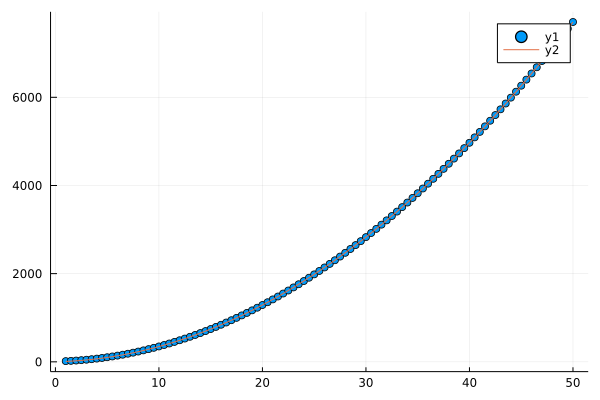

In [8]:
plot!(x,f.(x,p,q,r))

### Let us do it using zygote's gradient

In [9]:
function forward(x,y,a,b,c)
    ŷ = f(x,a,b,c)
    l = loss(y,ŷ)
    return l
end

forward (generic function with 1 method)

In [10]:
a=rand()
b=rand()
c=rand()
η=0.0000015
ctr=0




while true
    
    grad_a=0
    grad_b=0
    grad_c=0
    net_loss=0
    
    for i = 1:length(x)
        net_loss += forward(x[i],y[i],a,b,c)
        _,_,g_a,g_b,g_c = gradient( (i1,i2,i3,i4,i5)->forward(i1,i2,i3,i4,i5) , x[i], y[i], a, b, c )
        grad_a += g_a
        grad_b += g_b
        grad_c += g_c
    end

    net_loss/=length(x)
    grad_a/=length(x)
    grad_b/=length(x)
    grad_c/=length(x)

    a -= η*grad_a
    b -= η*grad_b
    c -= η*grad_c
    
    if(ctr%100==0)
        @printf("%d loss=%.2f p=%.2f q=%.2f r=%.2f\n",ctr+1,net_loss,p,q,r)
    end
    
    ctr+=1
    
    if(isnan(net_loss))
        print("\n\n*************NOT A NUMBER FOUND**********************")
        break
    end
    
    if(net_loss<1)
        break
    end
end
    

1 loss=6069269.30 p=2.99 q=4.60 r=1.52
101 loss=493.00 p=2.99 q=4.60 r=1.52
201 loss=439.41 p=2.99 q=4.60 r=1.52
301 loss=432.44 p=2.99 q=4.60 r=1.52
401 loss=425.59 p=2.99 q=4.60 r=1.52
501 loss=418.84 p=2.99 q=4.60 r=1.52
601 loss=412.20 p=2.99 q=4.60 r=1.52
701 loss=405.67 p=2.99 q=4.60 r=1.52
801 loss=399.25 p=2.99 q=4.60 r=1.52
901 loss=392.92 p=2.99 q=4.60 r=1.52
1001 loss=386.70 p=2.99 q=4.60 r=1.52
1101 loss=380.58 p=2.99 q=4.60 r=1.52
1201 loss=374.55 p=2.99 q=4.60 r=1.52
1301 loss=368.62 p=2.99 q=4.60 r=1.52
1401 loss=362.79 p=2.99 q=4.60 r=1.52
1501 loss=357.05 p=2.99 q=4.60 r=1.52
1601 loss=351.40 p=2.99 q=4.60 r=1.52
1701 loss=345.84 p=2.99 q=4.60 r=1.52
1801 loss=340.37 p=2.99 q=4.60 r=1.52
1901 loss=334.99 p=2.99 q=4.60 r=1.52
2001 loss=329.69 p=2.99 q=4.60 r=1.52
2101 loss=324.48 p=2.99 q=4.60 r=1.52
2201 loss=319.35 p=2.99 q=4.60 r=1.52
2301 loss=314.30 p=2.99 q=4.60 r=1.52
2401 loss=309.33 p=2.99 q=4.60 r=1.52
2501 loss=304.45 p=2.99 q=4.60 r=1.52
2601 loss=299.64 p=2

21601 loss=17.39 p=2.99 q=4.60 r=1.52
21701 loss=17.16 p=2.99 q=4.60 r=1.52
21801 loss=16.95 p=2.99 q=4.60 r=1.52
21901 loss=16.73 p=2.99 q=4.60 r=1.52
22001 loss=16.52 p=2.99 q=4.60 r=1.52
22101 loss=16.31 p=2.99 q=4.60 r=1.52
22201 loss=16.11 p=2.99 q=4.60 r=1.52
22301 loss=15.91 p=2.99 q=4.60 r=1.52
22401 loss=15.71 p=2.99 q=4.60 r=1.52
22501 loss=15.51 p=2.99 q=4.60 r=1.52
22601 loss=15.32 p=2.99 q=4.60 r=1.52
22701 loss=15.13 p=2.99 q=4.60 r=1.52
22801 loss=14.95 p=2.99 q=4.60 r=1.52
22901 loss=14.76 p=2.99 q=4.60 r=1.52
23001 loss=14.58 p=2.99 q=4.60 r=1.52
23101 loss=14.41 p=2.99 q=4.60 r=1.52
23201 loss=14.23 p=2.99 q=4.60 r=1.52
23301 loss=14.06 p=2.99 q=4.60 r=1.52
23401 loss=13.89 p=2.99 q=4.60 r=1.52
23501 loss=13.73 p=2.99 q=4.60 r=1.52
23601 loss=13.56 p=2.99 q=4.60 r=1.52
23701 loss=13.40 p=2.99 q=4.60 r=1.52
23801 loss=13.24 p=2.99 q=4.60 r=1.52
23901 loss=13.09 p=2.99 q=4.60 r=1.52
24001 loss=12.94 p=2.99 q=4.60 r=1.52
24101 loss=12.78 p=2.99 q=4.60 r=1.52
24201 loss=1

43801 loss=3.88 p=2.99 q=4.60 r=1.52
43901 loss=3.87 p=2.99 q=4.60 r=1.52
44001 loss=3.87 p=2.99 q=4.60 r=1.52
44101 loss=3.86 p=2.99 q=4.60 r=1.52
44201 loss=3.86 p=2.99 q=4.60 r=1.52
44301 loss=3.85 p=2.99 q=4.60 r=1.52
44401 loss=3.84 p=2.99 q=4.60 r=1.52
44501 loss=3.84 p=2.99 q=4.60 r=1.52
44601 loss=3.83 p=2.99 q=4.60 r=1.52
44701 loss=3.83 p=2.99 q=4.60 r=1.52
44801 loss=3.82 p=2.99 q=4.60 r=1.52
44901 loss=3.82 p=2.99 q=4.60 r=1.52
45001 loss=3.81 p=2.99 q=4.60 r=1.52
45101 loss=3.81 p=2.99 q=4.60 r=1.52
45201 loss=3.80 p=2.99 q=4.60 r=1.52
45301 loss=3.79 p=2.99 q=4.60 r=1.52
45401 loss=3.79 p=2.99 q=4.60 r=1.52
45501 loss=3.79 p=2.99 q=4.60 r=1.52
45601 loss=3.78 p=2.99 q=4.60 r=1.52
45701 loss=3.78 p=2.99 q=4.60 r=1.52
45801 loss=3.77 p=2.99 q=4.60 r=1.52
45901 loss=3.77 p=2.99 q=4.60 r=1.52
46001 loss=3.76 p=2.99 q=4.60 r=1.52
46101 loss=3.76 p=2.99 q=4.60 r=1.52
46201 loss=3.75 p=2.99 q=4.60 r=1.52
46301 loss=3.75 p=2.99 q=4.60 r=1.52
46401 loss=3.74 p=2.99 q=4.60 r=1.52
4

LoadError: InterruptException:

This is the values again we could approximate for a,b,c

In [11]:
(a,b,c)

(2.9896846337706826, 4.6376263818727, 0.597338766349722)

Below are the plots of : (Note how close we are)
- Original function
- Handwritten function
- Using zygote's gradient

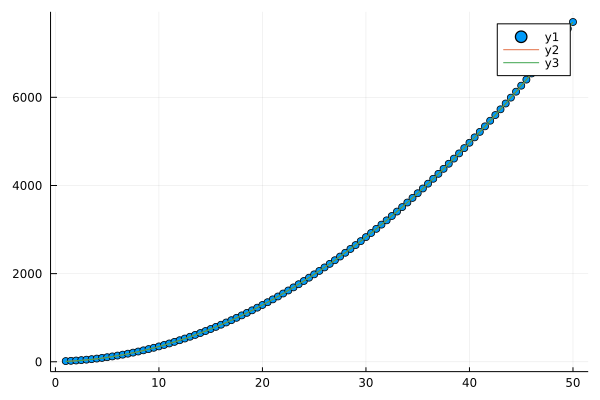

In [12]:
plot!(x,f.(x,a,b,c))